<a href="https://colab.research.google.com/github/MONAlIS-A/random-forest/blob/main/rf_learning_tool.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
import random

In [9]:
X,y = make_classification(n_features=5, n_redundant=0, n_informative=5,n_clusters_per_class=1)

In [10]:
df = pd.DataFrame(X,columns=['col1','col2','col3','col4','col5'])
df['target'] = y
print(df.shape)
df.head()

(100, 6)


,col1,col2,col3,col4,col5,target
0,-2.076261,-0.535778,1.698726,-0.119599,2.788863,1
1,-0.567805,1.504583,2.227800,2.289844,0.349127,1
2,-1.600958,0.847503,1.776790,0.404285,1.728144,1
3,-0.388578,1.681522,-0.676855,1.644524,1.126733,1
4,-1.035870,-1.079738,0.385540,-0.574613,0.047142,0


In [11]:
# function for row sampling

def sample_rows(df,percent):
  return df.sample(int(percent*df.shape[0]),replace=True)

In [12]:
# function for feature sampling
def sample_features(df,percent):
  cols = random.sample(df.columns.tolist()[:-1],int(percent*(df.shape[1]-1)))
  new_df = df[cols]
  new_df['target'] = df['target']
  return new_df

In [13]:
# function for combined sampling

def combined_sampling(df,row_percent,col_percent):
  new_df = sample_rows(df,row_percent)
  return sample_features(new_df,col_percent)

In [14]:
df1 = combined_sampling(df,0.5,0.5)

/tmp/ipython-input-3275485051.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [15]:
df2 = combined_sampling(df,0.5,0.5)

/tmp/ipython-input-3275485051.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [16]:
df3 = combined_sampling(df,0.5,0.5)

/tmp/ipython-input-3275485051.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [17]:
print(df1.columns)
print(df2.columns)
print(df3.columns)

Index(['col4', 'col5', 'target'], dtype='object')
Index(['col2', 'col4', 'target'], dtype='object')
Index(['col1', 'col2', 'target'], dtype='object')


In [18]:
df3

,col1,col2,target
2,-1.600958,0.847503,1
95,-0.563409,-0.962847,0
56,1.069054,-1.940794,0
69,2.442766,-1.390280,0
84,-1.073362,-0.030112,0
59,1.481179,-0.667306,0
60,2.916217,-2.164452,0
14,-0.894782,0.519124,1
0,-2.076261,-0.535778,1
3,-0.388578,1.681522,1


In [19]:
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()

In [20]:
clf1.fit(df1.iloc[:,0:2],df1.iloc[:,-1])
clf2.fit(df2.iloc[:,0:2],df2.iloc[:,-1])
clf3.fit(df3.iloc[:,0:2],df3.iloc[:,-1])

DecisionTreeClassifier()

In [21]:
from sklearn.tree import plot_tree

[Text(0.5454545454545454, 0.9375, 'x[0] <= 0.326\ngini = 0.487\nsamples = 50\nvalue = [21.0, 29.0]'),
 Text(0.36363636363636365, 0.8125, 'x[1] <= 2.468\ngini = 0.478\nsamples = 33\nvalue = [20, 13]'),
 Text(0.45454545454545453, 0.875, 'True  '),
 Text(0.2727272727272727, 0.6875, 'x[0] <= -1.745\ngini = 0.428\nsamples = 29\nvalue = [20, 9]'),
 Text(0.18181818181818182, 0.5625, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(0.36363636363636365, 0.5625, 'x[0] <= -0.93\ngini = 0.483\nsamples = 22\nvalue = [13, 9]'),
 Text(0.18181818181818182, 0.4375, 'x[0] <= -1.159\ngini = 0.278\nsamples = 6\nvalue = [1, 5]'),
 Text(0.09090909090909091, 0.3125, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.2727272727272727, 0.3125, 'x[0] <= -1.065\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.18181818181818182, 0.1875, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.36363636363636365, 0.1875, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.5454545454545454, 0.4375, 'x[1] <= 1.411\

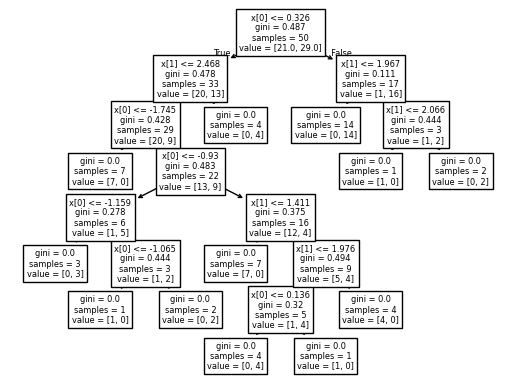

In [23]:
plot_tree(clf1)

[Text(0.6666666666666666, 0.9444444444444444, 'x[0] <= 0.394\ngini = 0.5\nsamples = 50\nvalue = [25, 25]'),
 Text(0.5, 0.8333333333333334, 'x[0] <= -0.763\ngini = 0.367\nsamples = 33\nvalue = [25, 8]'),
 Text(0.5833333333333333, 0.8888888888888888, 'True  '),
 Text(0.3333333333333333, 0.7222222222222222, 'gini = 0.0\nsamples = 16\nvalue = [16, 0]'),
 Text(0.6666666666666666, 0.7222222222222222, 'x[1] <= 0.479\ngini = 0.498\nsamples = 17\nvalue = [9, 8]'),
 Text(0.5, 0.6111111111111112, 'x[1] <= 0.097\ngini = 0.49\nsamples = 14\nvalue = [6, 8]'),
 Text(0.3333333333333333, 0.5, 'x[0] <= -0.557\ngini = 0.48\nsamples = 10\nvalue = [6, 4]'),
 Text(0.16666666666666666, 0.3888888888888889, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.5, 0.3888888888888889, 'x[0] <= -0.312\ngini = 0.444\nsamples = 9\nvalue = [6, 3]'),
 Text(0.3333333333333333, 0.2777777777777778, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.6666666666666666, 0.2777777777777778, 'x[1] <= -0.838\ngini = 0.49\nsampl

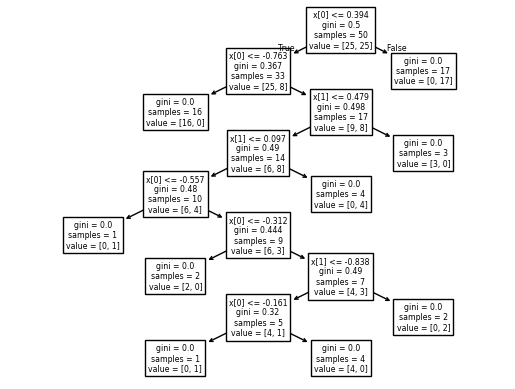

In [24]:
plot_tree(clf2)

[Text(0.5, 0.875, 'x[1] <= -0.316\ngini = 0.487\nsamples = 50\nvalue = [21.0, 29.0]'),
 Text(0.25, 0.625, 'x[0] <= -1.865\ngini = 0.091\nsamples = 21\nvalue = [20, 1]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.375, 0.375, 'gini = 0.0\nsamples = 20\nvalue = [20, 0]'),
 Text(0.75, 0.625, 'x[1] <= -0.0\ngini = 0.067\nsamples = 29\nvalue = [1, 28]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[1] <= -0.041\ngini = 0.278\nsamples = 6\nvalue = [1, 5]'),
 Text(0.5, 0.125, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.75, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.875, 0.375, 'gini = 0.0\nsamples = 23\nvalue = [0, 23]')]

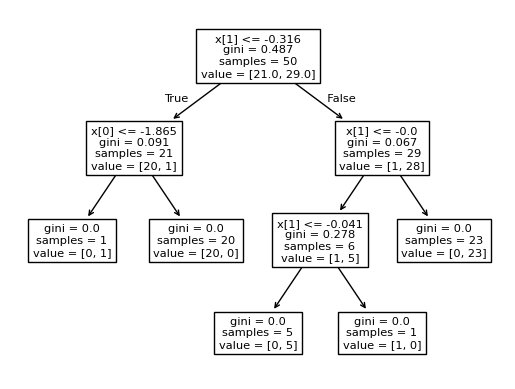

In [25]:
plot_tree(clf3)

In [26]:
clf1.predict(np.array([-1.042498,	-0.064323]).reshape(1,2))

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [27]:
clf2.predict(np.array([-1.042498,	-0.064323]).reshape(1,2))

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [28]:
clf3.predict(np.array([-1.042498,	-0.064323]).reshape(1,2))

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [29]:
df.sample(14,replace=True)

,col1,col2,col3,col4,col5,target
64,0.098324,-1.498979,2.352987,-3.181925,0.280224,0
12,-1.973514,0.381986,-0.803483,-1.502017,0.363140,1
57,2.825171,-2.374990,0.420965,1.500654,4.152381,0
53,0.373663,0.512708,1.208866,-0.307638,0.076484,1
24,1.818730,-1.017393,2.150643,-2.826541,1.009081,0
61,-0.726962,1.697096,0.782628,2.382633,0.525289,1
93,-1.000122,2.340329,-1.516908,3.054320,-0.538544,1
86,-2.433120,-0.290956,1.825310,-0.678624,1.804849,1
0,-2.076261,-0.535778,1.698726,-0.119599,2.788863,1
92,1.745680,-1.886782,1.349972,-1.126862,2.610950,0
